In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# User-based recommendations

In [2]:
# the file is in a Box folder 
ratings = pd.read_csv('ratings_large.csv')
ratings

,userId,movieId,rating,timestamp,title
0,4,1,4.0,1113765937,Toy Story (1995)
1,4,2,4.0,1113767306,Jumanji (1995)
2,4,5,2.0,1123990453,Father of the Bride Part II (1995)
3,4,6,4.5,1113767242,Heat (1995)
4,4,10,4.0,1113765995,GoldenEye (1995)
...,...,...,...,...,...
10395149,283224,1388,2.0,851001995,Jaws 2 (1978)
10395150,283224,1394,3.0,851002354,Raising Arizona (1987)
10395151,283224,1396,3.0,851002354,Sneakers (1992)
10395152,283224,2019,5.0,851000812,Seven Samurai (Shichinin no samurai) (1954)


In [3]:
# (transpose) ratings matrix
ratings_matrix = ratings.pivot(index='title',columns='userId',values='rating')
ratings_matrix

userId,4,19,42,43,51,55,56,71,73,79,...,283153,283164,283165,283170,283183,283184,283185,283195,283204,283224
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.5,NaN,...,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,4.0,...,3.0,NaN,4.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN
101 Dalmatians (1996),NaN,NaN,4.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,3.5,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.5,NaN,NaN
12 Angry Men (1957),1.5,5.0,NaN,4.5,5.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,...,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.5,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# select a userId (this will be our "test" user)
user = 4
user_ratings = ratings_matrix.loc[:,user]
user_ratings

In [ ]:
# drop user column from the ratings matrix
ratings_matrix.drop(user,axis=1,inplace=True)

In [4]:
# alternatively: use a fake user

# fake user likes sci-fi films, action-adventures films, and doesn't like romance films, kid movies
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fake_user.csv'
user_ratings = pd.read_csv(url,index_col='title').squeeze("columns")
user_ratings

title
(500) Days of Summer (2009)                              NaN
10 Things I Hate About You (1999)                        NaN
101 Dalmatians (1996)                                    NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)   NaN
12 Angry Men (1957)                                      NaN
                                                          ..
Zoolander (2001)                                         NaN
Zootopia (2016)                                          NaN
eXistenZ (1999)                                          NaN
xXx (2002)                                               NaN
¡Three Amigos! (1986)                                    NaN
Name: rating, Length: 1344, dtype: float64

In [7]:
# movies rated by the user
user_ratings[user_ratings.notna()].index.to_list()

['2001: A Space Odyssey (1968)',
 '2012 (2009)',
 '28 Days Later (2002)',
 '300 (2007)',
 '3:10 to Yuma (2007)',
 '50 First Dates (2004)',
 'A.I. Artificial Intelligence (2001)',
 'AVP: Alien vs. Predator (2004)',
 'Abyss, The (1989)',
 'Air Force One (1997)',
 'Akira (1988)',
 'Aladdin (1992)',
 'Alice in Wonderland (2010)',
 'Alien (1979)',
 'Alien: Resurrection (1997)',
 'Aliens (1986)',
 'All About Eve (1950)',
 'Amadeus (1984)',
 "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",
 'American Beauty (1999)',
 'American Pie (1999)',
 'American Pie 2 (2001)',
 'American Psycho (2000)',
 'Annie Hall (1977)',
 'Apartment, The (1960)',
 'Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Aristocats, The (1970)',
 'Arrival (2016)',
 'Bambi (1942)',
 'Basic Instinct (1992)',
 'Batman Begins (2005)',
 'Beautiful Mind, A (2001)',
 'Before Sunrise (1995)',
 'Before Sunset (2004)',
 'Being John Malkovich (1999)',
 'Ben-Hur (1959)',
 'Big Fish (2003)',
 'Big Lebowski, The (1998)',
 'Black Hawk

In [8]:
# movies not rated by the user
user_ratings[user_ratings.isna()].index.to_list()

['(500) Days of Summer (2009)',
 '10 Things I Hate About You (1999)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '12 Angry Men (1957)',
 '12 Years a Slave (2013)',
 '127 Hours (2010)',
 '13 Going on 30 (2004)',
 '13th Warrior, The (1999)',
 '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)',
 '20,000 Leagues Under the Sea (1954)',
 '21 Grams (2003)',
 '21 Jump Street (2012)',
 '25th Hour (2002)',
 '28 Days (2000)',
 '28 Weeks Later (2007)',
 '40-Year-Old Virgin, The (2005)',
 '6th Day, The (2000)',
 '8 Mile (2002)',
 'About Schmidt (2002)',
 'About a Boy (2002)',
 'Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Adaptation (2002)',
 'Addams Family Values (1993)',
 'Addams Family, The (1991)',
 'Adventures in Babysitting (1987)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'African Queen, The (1951)',
 'Airheads (1994)',
 'Airplane II: The Sequel (1982)',
 'Airplane! (1980)',
 'Alice in Won

In [9]:
# ratings distribution
user_ratings.value_counts(dropna=False)

NaN    1059
4.0      72
1.0      66
5.0      54
2.0      42
3.0      28
0.5      22
3.5       1
Name: rating, dtype: int64

In [6]:
# user top movies
user_ratings.sort_values(ascending=False).head(20)

title
Master and Commander: The Far Side of the World (2003)       5.0
Day the Earth Stood Still, The (1951)                        5.0
Blade Runner (1982)                                          5.0
Matrix, The (1999)                                           5.0
Lord of the Rings: The Two Towers, The (2002)                5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)    5.0
Casino (1995)                                                5.0
Jurassic Park (1993)                                         5.0
Iron Man 2 (2010)                                            5.0
Invasion of the Body Snatchers (1956)                        5.0
Interstellar (2014)                                          5.0
Inglourious Basterds (2009)                                  5.0
Independence Day (a.k.a. ID4) (1996)                         5.0
Dark City (1998)                                             5.0
Dark Knight, The (2008)                                      5.0
Dawn of the Dead (2

In [7]:
# user bottom movies
user_ratings.sort_values().head(20)

title
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.5
Grease (1978)                                           0.5
Notebook, The (2004)                                    0.5
How to Train Your Dragon (2010)                         0.5
Titanic (1997)                                          0.5
Frozen (2013)                                           0.5
Toy Story 3 (2010)                                      0.5
Harry Potter and the Goblet of Fire (2005)              0.5
Sound of Music, The (1965)                              0.5
It's a Wonderful Life (1946)                            0.5
Twilight (2008)                                         0.5
Meet Joe Black (1998)                                   0.5
K-PAX (2001)                                            0.5
Harry Potter and the Deathly Hallows: Part 2 (2011)     0.5
Kung Fu Panda (2008)                                    0.5
Princess Mononoke (Mononoke-hime) (1997)                0.5
Lilo & Stitch (2002)              

In [5]:
# user mean rating
user_mean = user_ratings.mean()
user_mean

2.829824561403509

In [6]:
# user standard deviation rating
user_std = user_ratings.std()
user_std

1.5960961300738952

In [7]:
user_zscores = (user_ratings-user_mean)/user_std
user_zscores

title
(500) Days of Summer (2009)                              NaN
10 Things I Hate About You (1999)                        NaN
101 Dalmatians (1996)                                    NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)   NaN
12 Angry Men (1957)                                      NaN
                                                          ..
Zoolander (2001)                                         NaN
Zootopia (2016)                                          NaN
eXistenZ (1999)                                          NaN
xXx (2002)                                               NaN
¡Three Amigos! (1986)                                    NaN
Name: rating, Length: 1344, dtype: float64

## The z-scores matrix

In [8]:
# matrix of z-scores (scale-free ratings)
z_scores = (ratings_matrix - ratings_matrix.mean())/ratings_matrix.std()
z_scores

userId,4,19,42,43,51,55,56,71,73,79,...,283153,283164,283165,283170,283183,283184,283185,283195,283204,283224
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,NaN,0.441226,NaN,NaN,NaN,NaN,-1.447012,0.883303,NaN,...,NaN,NaN,NaN,-0.552253,NaN,0.258297,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,-1.913005,NaN,NaN,NaN,-0.311645,...,0.197451,NaN,1.846808,NaN,NaN,NaN,NaN,-1.542636,NaN,NaN
101 Dalmatians (1996),NaN,NaN,0.441226,NaN,NaN,NaN,-2.040622,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,-0.111992,-1.576142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.538664,0.772019,NaN,NaN
12 Angry Men (1957),-1.747367,1.905267,NaN,0.523548,1.245453,NaN,1.210739,NaN,NaN,NaN,...,NaN,NaN,0.006166,NaN,NaN,NaN,NaN,NaN,NaN,1.290966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,-0.182702,NaN,-1.694737,NaN,...,0.197451,NaN,NaN,NaN,NaN,-1.559117,NaN,-0.385309,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),-0.021893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Similarities

In [9]:
# user similarity function = correlation 
similarities = z_scores.corrwith(user_zscores)
similarities

userId
4         0.289698
19       -0.049808
42        0.205664
43        0.016950
51       -0.112660
            ...   
283184   -0.125203
283185   -0.374497
283195   -0.048138
283204    0.150890
283224    0.334381
Length: 35289, dtype: float64

## Prediction function

In [10]:
# select number of neighbors
k = 10

# select an (unrated) item: 'Dawn of the Dead (2004)', "Zoolander (2001)", 'Duck Soup (1933)'
item = 'Zoolander (2001)'

In [18]:
# k nearest neighbors similarities
knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)
knn_sim

userId
29146     0.697896
65050     0.691154
267953    0.659395
143057    0.650593
35227     0.629265
26732     0.623457
253860    0.615490
124861    0.613331
4395      0.604405
269669    0.602788
dtype: float64

In [19]:
# normalization factor
total = knn_sim.abs().sum()
total

6.387773929937664

In [20]:
# k nearest neighbors
knn = knn_sim.index
knn

Int64Index([29146, 65050, 267953, 143057, 35227, 26732, 253860, 124861, 4395,
            269669],
           dtype='int64', name='userId')

In [21]:
knn_z_scores = z_scores.loc[item,knn]
knn_z_scores

userId
29146    -0.476857
65050    -1.135447
267953   -3.756202
143057    0.157884
35227    -0.739895
26732     0.510159
253860    0.763348
124861    0.032894
4395      1.355135
269669    0.034749
Name: Zoolander (2001), dtype: float64

In [22]:
# prediction
prediction = user_mean + user_std*knn_z_scores.dot(knn_sim)/total
print(item+': '+str(np.round(prediction,1)))

Zoolander (2001): 2.3


In [23]:
# the same in one cell:

# select number of neighbors
k = 10

# select item
item = "Blair Witch Project, The (1999)"# 

# k nearest neighbors similarities
knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)
    
# normalization factor
total = knn_sim.abs().sum()

# k nearest neighbors
knn = knn_sim.index

# k nearest neighbors z-scores
knn_z_scores = z_scores.loc[item,knn]

# prediction
prediction = user_mean + user_std*knn_sim.dot(knn_z_scores)/total

print(item+': '+str(np.round(prediction,1)))

Blair Witch Project, The (1999): 2.4


Let us predict the ratings for all unrated movies.

In [14]:
# unrated movies
unrated_movies = user_ratings[user_ratings.isna()].index
unrated_movies

Index(['(500) Days of Summer (2009)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1996)',
       '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
       '12 Angry Men (1957)', '12 Years a Slave (2013)', '127 Hours (2010)',
       '13 Going on 30 (2004)', '13th Warrior, The (1999)',
       '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)',
       ...
       'You've Got Mail (1998)', 'Young Frankenstein (1974)',
       'Young Guns (1988)', 'Zodiac (2007)', 'Zombieland (2009)',
       'Zoolander (2001)', 'Zootopia (2016)', 'eXistenZ (1999)', 'xXx (2002)',
       '¡Three Amigos! (1986)'],
      dtype='object', name='title', length=1059)

In [15]:
user_ratings_pred = pd.Series(index=unrated_movies)
user_ratings_pred

C:\Users\javier.perez-alvaro\AppData\Local\Temp\ipykernel_12424\3009066579.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  user_ratings_pred = pd.Series(index=unrated_movies)


title
(500) Days of Summer (2009)                              NaN
10 Things I Hate About You (1999)                        NaN
101 Dalmatians (1996)                                    NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)   NaN
12 Angry Men (1957)                                      NaN
                                                          ..
Zoolander (2001)                                         NaN
Zootopia (2016)                                          NaN
eXistenZ (1999)                                          NaN
xXx (2002)                                               NaN
¡Three Amigos! (1986)                                    NaN
Length: 1059, dtype: float64

In [16]:
for item in unrated_movies:
    knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)

    # normalization factor
    total = knn_sim.abs().sum()

    # k nearest neighbors
    knn = knn_sim.index

    # k nearest neighbors z-scores
    knn_z_scores = z_scores.loc[item,knn]

    # prediction
    user_ratings_pred[item] = user_mean + user_std*knn_sim.dot(knn_z_scores)/total


In [17]:
# top 20 recommendations
user_ratings_pred.sort_values(ascending=False).head(20)

title
Star Wars: Episode V - The Empire Strikes Back (1980)             4.564217
American History X (1998)                                         4.395307
Ghost in the Shell (Kôkaku kidôtai) (1995)                        4.372755
Departed, The (2006)                                              4.365995
Lord of the Rings: The Return of the King, The (2003)             4.311291
L.A. Confidential (1997)                                          4.293398
Once Upon a Time in the West (C'era una volta il West) (1968)     4.289093
Sting, The (1973)                                                 4.248143
Highlander (1986)                                                 4.246966
Matrix Revolutions, The (2003)                                    4.240243
Predator (1987)                                                   4.219169
Heat (1995)                                                       4.214763
Name of the Rose, The (Name der Rose, Der) (1986)                 4.207828
John Wick (2014)   

In [18]:
# bottom 20 recommendations
user_ratings_pred.sort_values(ascending=False).tail(20)

title
Casper (1995)                                             0.699906
Cinderella (1950)                                         0.698094
Prince of Egypt, The (1998)                               0.680200
Honey, I Blew Up the Kid (1992)                           0.619627
Beauty and the Beast (1991)                               0.607981
Sleeping Beauty (1959)                                    0.606085
Legally Blonde (2001)                                     0.576095
Lady and the Tramp (1955)                                 0.566534
Snow White and the Seven Dwarfs (1937)                    0.545692
Miracle on 34th Street (1994)                             0.529628
13 Going on 30 (2004)                                     0.473137
Spy Kids (2001)                                           0.444618
James and the Giant Peach (1996)                          0.431036
Babe (1995)                                               0.426545
101 Dalmatians (One Hundred and One Dalmatians) (1961)  

## How good are the predictions?

In [11]:
user_ratings = user_ratings.to_frame('rating')
user_ratings['prediction'] = np.NaN
user_ratings

,rating,prediction
title,,
(500) Days of Summer (2009),NaN,NaN
10 Things I Hate About You (1999),NaN,NaN
101 Dalmatians (1996),NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN
12 Angry Men (1957),NaN,NaN
...,...,...
Zoolander (2001),NaN,NaN
Zootopia (2016),NaN,NaN
eXistenZ (1999),NaN,NaN


In [12]:
# predict rating for each movie (regardless of whether the movie has been rated or not)
k = 10
for item in user_ratings.index:
    knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)

    # normalization factor
    total = knn_sim.abs().sum()

    # k nearest neighbors
    knn = knn_sim.index

    # k nearest neighbors z-scores
    knn_z_scores = z_scores.loc[item,knn]

    # prediction
    user_ratings.loc[item,'prediction'] = user_mean + user_std*knn_sim.dot(knn_z_scores)/total

In [13]:
user_ratings

,rating,prediction
title,,
(500) Days of Summer (2009),NaN,2.176663
10 Things I Hate About You (1999),NaN,1.568083
101 Dalmatians (1996),NaN,0.793997
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,0.319163
12 Angry Men (1957),NaN,2.554362
...,...,...
Zoolander (2001),NaN,2.252833
Zootopia (2016),NaN,1.325693
eXistenZ (1999),NaN,3.049560


In [14]:
# prediction error
user_ratings['error'] = user_ratings.rating - user_ratings.prediction
user_ratings

,rating,prediction,error
title,,,
(500) Days of Summer (2009),NaN,2.176663,NaN
10 Things I Hate About You (1999),NaN,1.568083,NaN
101 Dalmatians (1996),NaN,0.793997,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,0.319163,NaN
12 Angry Men (1957),NaN,2.554362,NaN
...,...,...,...
Zoolander (2001),NaN,2.252833,NaN
Zootopia (2016),NaN,1.325693,NaN
eXistenZ (1999),NaN,3.049560,NaN


<AxesSubplot:>

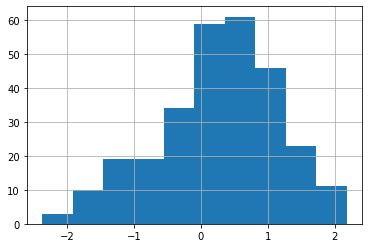

In [15]:
# error histogram
user_ratings.loc[user_ratings.error.notna(),'error'].hist()

In [17]:
# (square root of the) mean squared error
num_rated_movies = user_ratings.rating.notna().sum()
np.sqrt((user_ratings.loc[user_ratings.error.notna(),'error']**2).sum()/num_rated_movies)

0.9266701364012264

## Selecting the number of neighbors (k)

In [35]:
user_ratings

,rating,prediction,error
title,,,
(500) Days of Summer (2009),NaN,2.176663,NaN
10 Things I Hate About You (1999),NaN,1.568083,NaN
101 Dalmatians (1996),NaN,0.793997,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,0.319163,NaN
12 Angry Men (1957),NaN,2.554362,NaN
...,...,...,...
Zoolander (2001),NaN,2.252833,NaN
Zootopia (2016),NaN,1.325693,NaN
eXistenZ (1999),NaN,3.049560,NaN


In [36]:
k_list = np.arange(1,50)
errors = np.zeros(len(k_list))
num_unrated_movies = user_ratings.rating.isna().sum()

for i in range(len(k_list)):
    k = k_list[i]
    # predict ratings
    for item in user_ratings.index:
        knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)

        # normalization factor
        total = knn_sim.abs().sum()

        # k nearest neighbors
        knn = knn_sim.index

        # k nearest neighbors z-scores
        knn_z_scores = z_scores.loc[item,knn]

        # prediction
        user_ratings.loc[item,'prediction'] = user_mean + user_std*knn_sim.dot(knn_z_scores)/total
        
    # error
    user_ratings['error'] = user_ratings.rating - user_ratings.prediction    
    # compute mean squared error
    errors[i] = np.sqrt((user_ratings.loc[user_ratings.error.notna(),'error']**2).sum()/num_unrated_movies)

Text(0, 0.5, 'prediction error')

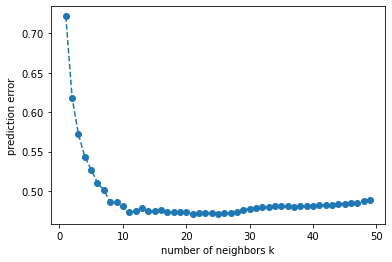

In [37]:
plt.plot(k_list,errors,'o--')
plt.xlabel('number of neighbors k')
plt.ylabel('prediction error')

## The impact of the long tail

In [18]:
# number of ratings each movie received
n_ratings = ratings.groupby('title')['rating'].count()
n_ratings

title
(500) Days of Summer (2009)                               6030
10 Things I Hate About You (1999)                         8385
101 Dalmatians (1996)                                     5327
101 Dalmatians (One Hundred and One Dalmatians) (1961)    6326
12 Angry Men (1957)                                       9469
                                                          ... 
Zoolander (2001)                                          8618
Zootopia (2016)                                           4031
eXistenZ (1999)                                           4437
xXx (2002)                                                5112
¡Three Amigos! (1986)                                     5166
Name: rating, Length: 1344, dtype: int64

Text(0, 0.5, 'number of movies')

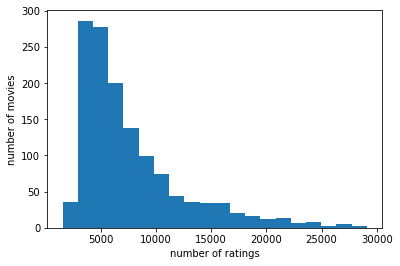

In [19]:
n_ratings.plot.hist(bins=20)
plt.xlabel('number of ratings')
plt.ylabel('number of movies')

In [20]:
# popular movies
n_ratings[n_ratings>20000].sort_values(ascending=False)

title
Forrest Gump (1994)                                                               29095
Matrix, The (1999)                                                                28917
Pulp Fiction (1994)                                                               28128
Star Wars: Episode IV - A New Hope (1977)                                         27398
Silence of the Lambs, The (1991)                                                  26916
Shawshank Redemption, The (1994)                                                  26635
Star Wars: Episode V - The Empire Strikes Back (1980)                             26582
Jurassic Park (1993)                                                              26423
Back to the Future (1985)                                                         26305
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    25597
Star Wars: Episode VI - Return of the Jedi (1983)                                 25334
Toy Story (1995)          

In [21]:
# number of users
n_users = ratings['userId'].nunique()
n_users

35289

In [22]:
# weights
weights = np.log(n_users/n_ratings)
weights

title
(500) Days of Summer (2009)                               1.766824
10 Things I Hate About You (1999)                         1.437127
101 Dalmatians (1996)                                     1.890783
101 Dalmatians (One Hundred and One Dalmatians) (1961)    1.718903
12 Angry Men (1957)                                       1.315548
                                                            ...   
Zoolander (2001)                                          1.409718
Zootopia (2016)                                           2.169557
eXistenZ (1999)                                           2.073593
xXx (2002)                                                1.931981
¡Three Amigos! (1986)                                     1.921473
Name: rating, Length: 1344, dtype: float64

In [23]:
weights['Matrix, The (1999)']

0.19914164317647326

In [24]:
weights['Dark City (1998)']

1.3463262548193837

In [25]:
# pandas does not have a built-in function that computes weighted correlations
def weighted_corrwith(y):
    # computes weighted correlation between x and y
    
    x = user_zscores
    
    # means
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # denominator
    den1 = np.sqrt(np.sum((weights*(x-mean_x)**2)))
    den2 = np.sqrt(np.sum((weights*(y-mean_y)**2)))
    den = den1*den2
    
    # numerator
    num = np.sum(weights*(x-mean_x)*(y-mean_y))
    
    return num/den

In [26]:
# weighted similarities
similarities = z_scores.apply(weighted_corrwith)
similarities

C:\Users\javier.perez-alvaro\AppData\Local\Temp\ipykernel_5020\933562684.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


userId
4         0.050276
19        0.004222
42        0.025606
43       -0.009501
51       -0.032180
            ...   
283184   -0.043505
283185   -0.027653
283195   -0.035021
283204    0.003724
283224    0.036143
Length: 35289, dtype: float64

In [27]:
user_ratings['prediction 2'] = np.NaN
user_ratings

,rating,prediction,error,prediction 2
title,,,,
(500) Days of Summer (2009),NaN,2.176663,NaN,NaN
10 Things I Hate About You (1999),NaN,1.568083,NaN,NaN
101 Dalmatians (1996),NaN,0.793997,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,0.319163,NaN,NaN
12 Angry Men (1957),NaN,2.554362,NaN,NaN
...,...,...,...,...
Zoolander (2001),NaN,2.252833,NaN,NaN
Zootopia (2016),NaN,1.325693,NaN,NaN
eXistenZ (1999),NaN,3.049560,NaN,NaN


In [28]:
# predict rating for each movie (regardless of whether the movie has been rated or not)
k = 10
for item in user_ratings.index:
    knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)

    # normalization factor
    total = knn_sim.abs().sum()

    # k nearest neighbors
    knn = knn_sim.index

    # k nearest neighbors z-scores
    knn_z_scores = z_scores.loc[item,knn]

    # prediction
    user_ratings.loc[item,'prediction 2'] = user_mean + user_std*knn_sim.dot(knn_z_scores)/total

In [ ]:
user_ratings

In [29]:
# top 20 recommendations 
user_ratings.loc[user_ratings.rating.isna(),'prediction 2'].sort_values(ascending=False).head(20)

title
Star Wars: Episode IV - A New Hope (1977)                4.733631
Usual Suspects, The (1995)                               4.646547
Star Wars: Episode V - The Empire Strikes Back (1980)    4.617198
Dark Knight Rises, The (2012)                            4.575422
Evil Dead II (Dead by Dawn) (1987)                       4.563789
Taxi Driver (1976)                                       4.507718
Army of Darkness (1993)                                  4.476801
Thing, The (1982)                                        4.468586
Heat (1995)                                              4.449924
Great Escape, The (1963)                                 4.352469
American History X (1998)                                4.303639
Back to the Future (1985)                                4.300234
Watchmen (2009)                                          4.277845
Departed, The (2006)                                     4.271043
Deadpool (2016)                                          4.260674
Star

In [51]:
# bottom  20 recommendations 
user_ratings.loc[user_ratings.rating.isna(),'prediction 2'].sort_values(ascending=False).tail(20)

title
Secret Garden, The (1993)                                  0.799150
Tangled (2010)                                             0.778906
Chicago (2002)                                             0.726402
28 Days (2000)                                             0.664304
Richie Rich (1994)                                         0.662105
Honey, I Blew Up the Kid (1992)                            0.636604
Babe: Pig in the City (1998)                               0.627670
Striptease (1996)                                          0.591334
101 Dalmatians (1996)                                      0.586101
To Wong Foo, Thanks for Everything! Julie Newmar (1995)    0.571428
Emperor's New Groove, The (2000)                           0.568319
Casper (1995)                                              0.560985
Beauty and the Beast (1991)                                0.501294
Evita (1996)                                               0.492087
Scary Movie 2 (2001)                      

In [52]:
user_ratings.loc['Twilight (2008)']

rating          0.500000
prediction     -0.191288
error           0.691288
prediction 2   -0.205214
Name: Twilight (2008), dtype: float64

## Appendix: create a fake user

In [53]:
fake_user = pd.DataFrame(index=ratings_matrix.index,columns=['rating'])
fake_user

,rating
title,
(500) Days of Summer (2009),NaN
10 Things I Hate About You (1999),NaN
101 Dalmatians (1996),NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN
12 Angry Men (1957),NaN
...,...
Zoolander (2001),NaN
Zootopia (2016),NaN
eXistenZ (1999),NaN


In [54]:
fake_user.to_csv('fake_kid_user.csv')